# 『3과목』 Data Analysis과 Data pre-processing

## 데이터 분석 파이프라인

해야 할 일은 캘리포니아 인구조사 데이터를 사용해 주택 가격 모델을 만들기 위한 데이터분석 파이프라인을 살펴 보는 것입니다.

### 설정

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결


### 데이터 다운로드

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


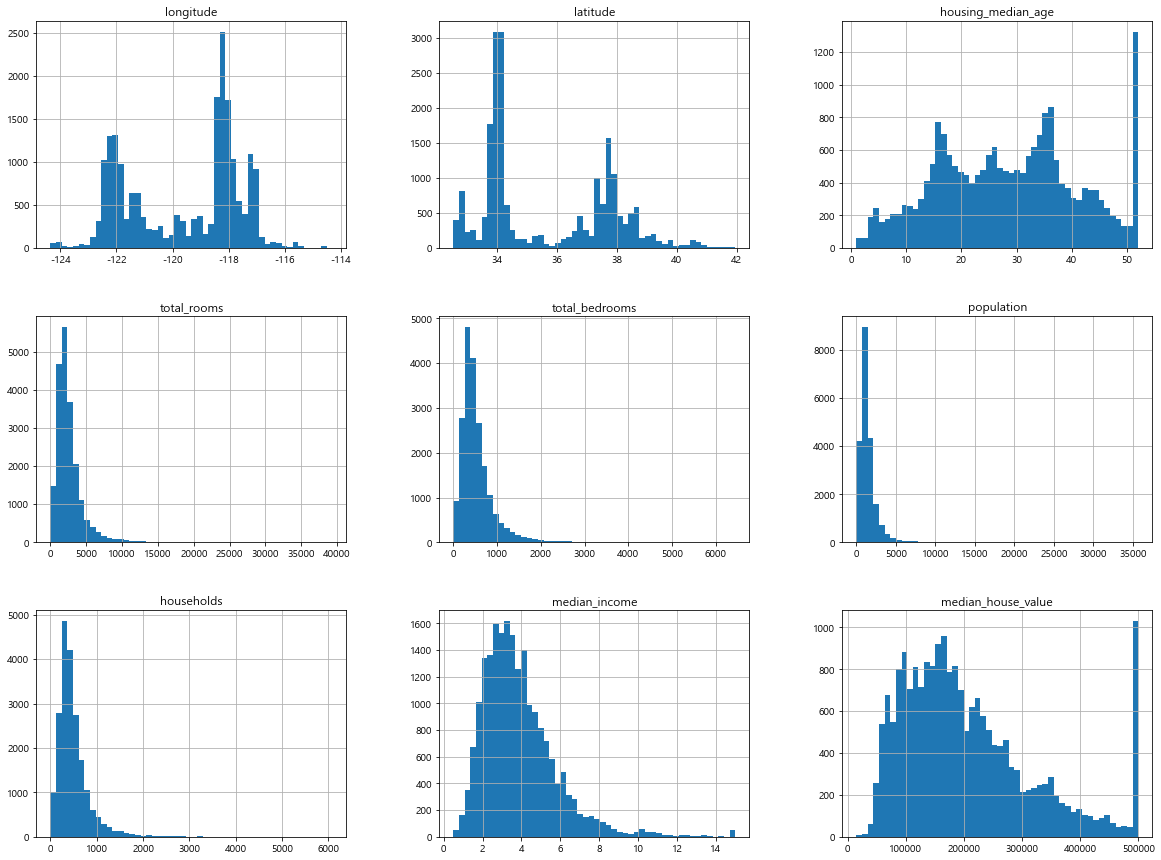

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 데이터 이해를 위한 탐색과 시각화

[Text(0.5, 0, '경도'), Text(0, 0.5, '위도')]

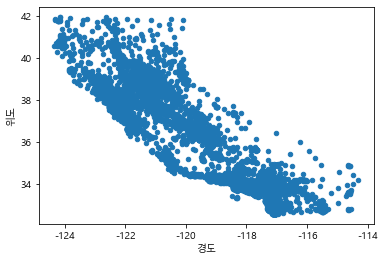

In [10]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도')

[Text(0.5, 0, '경도'), Text(0, 0.5, '위도')]

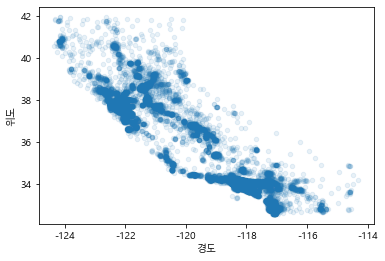

In [11]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')

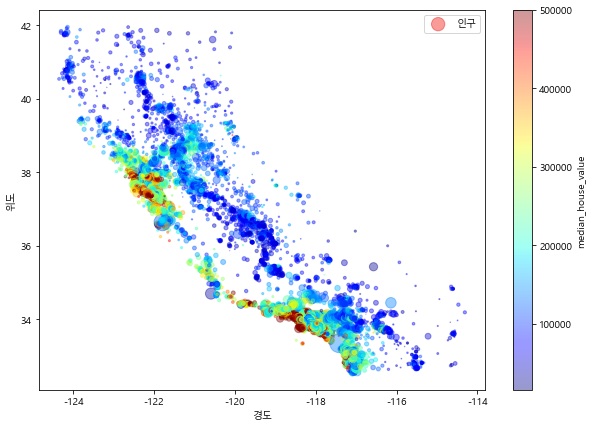

In [12]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()

### 머신러닝 알고리즘을 위한 데이터 준비

In [13]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [14]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [15]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [16]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [17]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

C:\DEV\anaconda3\envs\py_38_all_adsp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
housing_num = housing.drop('ocean_proximity', axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [19]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [20]:
dir(imputer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_concatenate_indicator',
 '_dense_fit',
 '_fit_indicator',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse_fit',
 '_transform_indicator',
 '_validate_data',
 '_validate_input',
 'add_indicator',
 'copy',
 'feature_names_in_',
 'fill_value',
 'fit',
 'fit_transform',
 'get_params',
 'indicator_',
 'inverse_transform',
 'missing_values',
 'n_features_in_',
 'set_params',
 'statistics_',
 'strategy',
 'transform',
 'verbose']

In [21]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [22]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

### 훈련 세트 변환:

In [23]:
X = imputer.transform(housing_num)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [25]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0


In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### 범주형 입력 특성

 범주형 입력 특성인 `ocean_proximity`을 전처리합니다:

In [27]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [28]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
# cat_encoder = CategoricalEncoder(encoding="onehot-dense")
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Test Set 생성

In [34]:
import numpy as np
# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

In [35]:
# 예시를 위해서 만든 것입니다. 사이킷런에는 train_test_split() 함수가 있습니다.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [36]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [37]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [38]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [39]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [40]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [41]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [42]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

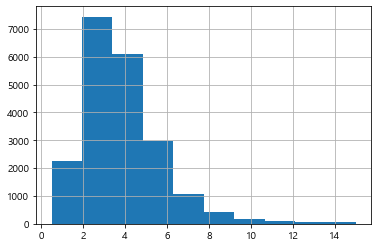

In [43]:
housing["median_income"].hist()

In [44]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [45]:
housing["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

<Axes: >

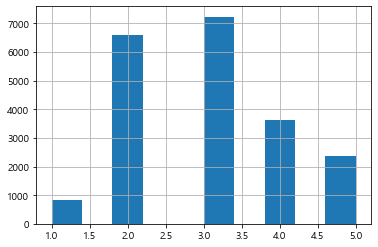

In [46]:
housing["income_cat"].hist()

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [48]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [49]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [50]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [51]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1.0,0.039826,0.039971,0.040213,0.973236,0.364964
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [52]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [53]:
housing = strat_train_set.copy()

### 모델 선택과 훈련

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Transformation Pipelines

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
            
        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self
        
    def transform(self, X):        
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=int)
        X_mask = np.ones_like(X, dtype=bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
            
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
            else:
                X_mask[:, i] = valid_mask
                X[:, i][~valid_mask] = self.categories_[i][0]
                
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [75]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [76]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [77]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
housing_prepared.shape

(16512, 17)

### 모델 선택과 훈련

In [79]:
housing_labels = strat_train_set["median_house_value"].copy()

In [80]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

## 데이터 분석을 위한 간단한 기능

### 데이터 가져오기

In [91]:
%pwd

'E:\\DEV\\python-works\\adsp'

In [88]:
%ls datasets

 E 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2019-9371

 E:\DEV\python-works\adsp\datasets 디렉터리

2023-11-17  오후 02:21    <DIR>          .
2023-11-17  오후 02:21    <DIR>          ..
2023-11-14  오전 11:52    <DIR>          housing
2023-11-17  오후 02:21             1,263 NM_207618.2.fna
               1개 파일               1,263 바이트
               3개 디렉터리  168,390,254,592 바이트 남음


In [93]:
f = open("./datasets/NM_207618.2.fna", "r")
sequence = f.read()
sequence

'>NM_207618.2 Mus musculus vomeronasal 1 receptor, D18 (V1rd18), mRNA\nGGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA\nGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT\nCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT\nTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT\nCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG\nAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA\nACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA\nGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT\nTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA\nGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA\nCCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT\nTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT\nGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCT

In [101]:
with open("./datasets/NM_207618.2.fna", "r") as inf:
    data = inf.read().splitlines(True)
with open('./datasets/dna1.txt', 'w') as outf:
    outf.writelines(data[1:])
f = open("./datasets/dna1.txt", "r")
sequence = f.read()
sequence

'GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA\nGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT\nCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT\nTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT\nCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG\nAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA\nACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA\nGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT\nTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA\nGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA\nCCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT\nTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT\nGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGG\nTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGA

In [102]:
print(sequence)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA
GATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT
CCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT
TAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT
CAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG
AGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA
ACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA
GGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT
TTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA
GTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA
CCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT
TATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT
GCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGG
TCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTT
GCTAAT

In [103]:
sequence = sequence.replace('\n', '')  # "\n"를 공란으로 대체
sequence

'GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACT

In [104]:
sequence = sequence.replace('\r', '')

In [105]:
sequence = sequence.replace(' ', '')

In [106]:
sequence[0:3]

'GGT'

### 데이터 가공

In [107]:
genetic_code = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}

In [108]:
genetic_code['ATA']

'I'

### 전체 코드

In [109]:
def read_seq(inputfile):
    with open(inputfile, 'r') as f:
        sequence = f.read()
    sequence = sequence.replace(' ', '')
    sequence = sequence.replace('\n', '')
    sequence = sequence.replace('\r', '')
    return sequence
with open('./datasets/NM_207618.2.fna', 'r') as inf:
    data = inf.read().splitlines(True)
with open('./datasets/dna.txt', 'w') as outf:
    outf.writelines(data[1:])
dna = read_seq('./datasets/dna.txt')
print(dna)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACTT

In [110]:
def convert(seq):
    """DNA 시퀀스를 아미노산 시퀀스로 변환"""
    genetic_code = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    protein = ""
    if len(seq) % 3 == 0:  # 데이터의 길이가 3의 배수이면 아래를 실행
        for i in range(0, len(seq), 3):
            codon = seq[i : i+3]
            protein += genetic_code[codon]
    return protein
print(convert(dna[20:938]))

MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC_


In [111]:
print(convert(dna[20:935]))

MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC


### 데이터 검증

In [112]:
prot = read_seq('./datasets/protein.txt')
print(prot)

MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC


In [15]:
prot == convert(dna[20:935])

True

# 외부 라이브러리

In [113]:
import sys
print("python 버전 : {}".format(sys.version))

import numpy as np
print("numpy 버전 : {}".format(np.__version__))

import pandas as pd
print("pandas 버전 : {}".format(pd.__version__))

python 버전 : 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
numpy 버전 : 1.24.3
pandas 버전 : 2.0.2


## Numpy

In [114]:
import numpy as np
print(np.array([1, 2, 3]))
print(np.arange(10))
print(np.linspace(0,2,4))
print(np.zeros((2,4)))

[1 2 3]
[0 1 2 3 4 5 6 7 8 9]
[0.         0.66666667 1.33333333 2.        ]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [115]:
N1 = np.array([[1, 2, 3], [2, 3, 4]])
N1

array([[1, 2, 3],
       [2, 3, 4]])

In [117]:
N1.shape

(2, 3)

In [118]:
N2 = np.array([1, 3, 5, 7, 9, 11]).reshape(3, 2)
print(N2)

[[ 1  3]
 [ 5  7]
 [ 9 11]]


In [119]:
N2 = np.array([1, 3, 5, 7, 9, 11]).reshape(2, 3)
print(N2)

[[ 1  3  5]
 [ 7  9 11]]


In [120]:
N3 = np.ones([3, 4])
print(N3)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [121]:
list1 = [[1, 11], [2, 12], [3, 13]]
print(list1[:][1])  # 의도하지 않은 결과 출력
print(list1[:, 1])  # Error 발생

[2, 12]


TypeError: list indices must be integers or slices, not tuple

In [122]:
import numpy as np
list1 = [[1, 11], [2, 12], [3, 13]]
np_ary = np.array(list1)
print(np_ary[:, 1])

[11 12 13]


In [123]:
import numpy as np
list1 = [[1, 11], [2, 12], [3, 13]]
print(np.array(list1[:, 1]))

TypeError: list indices must be integers or slices, not tuple

In [124]:
import numpy as np
list1 = np.array([[1, 11], [2, 12], [3, 13]])
print(list1[:, 1])

[11 12 13]


In [125]:
x = [1,2,3]
y = [4,5,6]
z = x + y
print(z)

[1, 2, 3, 4, 5, 6]


In [126]:
import numpy as np
x = np.array([1,2,3])
y = np.array([4,5,6])
z = x + y
print(z)

[5 7 9]


In [128]:
import numpy as np
a = np.array([1,2,3,6])
b = np.linspace(0,2,4)
c = a - b
print(c)
print(a**2)

[1.         1.33333333 1.66666667 4.        ]
[ 1  4  9 36]


In [129]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([[2, 3, 4], [5, 6, 7], [8, 9, 10]])
print(X[:,1]+Y[:,1])

[ 5 11 17]


In [133]:
import numpy as np
import math

a = np.linspace(-np.pi, np.pi, 3)
print(a)
print(np.cos(a))
print(math.cos(a))

[-3.14159265  0.          3.14159265]
[-1.  1. -1.]


TypeError: only size-1 arrays can be converted to Python scalars

In [134]:
import numpy as np
import math

a = np.linspace(-np.pi, np.pi, 3)
print(a)
print(np.cos(a))
print([math.cos(x) for x in a])

[-3.14159265  0.          3.14159265]
[-1.  1. -1.]
[-1.0, 1.0, -1.0]


In [136]:
print(np.arange(4))
print(np.arange(3, 6))
print(np.arange(5, 10, 2))

[0 1 2 3]
[3 4 5]
[5 7 9]


In [137]:
np.r_[1, 2, 5:9]

array([1, 2, 5, 6, 7, 8])

In [141]:
N11 = np.array([2, 4, 6, 8])
print(N11)
print(np.where(N11 > 5, "A", "B"))
print(np.where(N11 < 5, 1, 0))
print(np.where(N11 > 5, "A", N11))
print(np.where(N11 > 5, N11, "B"))

[2 4 6 8]
['B' 'B' 'A' 'A']
[1 1 0 0]
['2' '4' 'A' 'A']
['B' 'B' '6' '8']


In [143]:
print(np.exp(1))
print(np.exp(2))

2.718281828459045
7.38905609893065


In [148]:
np.log(2)

0.6931471805599453

In [150]:
np.log(np.exp(1))

1.0

In [146]:
np.log10(100)

2.0

## Pandas

### Series

In [151]:
pd.Series()

Series([], dtype: object)

In [153]:
pd.Series([100, 200, 300])

0    100
1    200
2    300
dtype: int64

In [154]:
pd.Series(np.array([100, 200, 300]))

0    100
1    200
2    300
dtype: int32

In [155]:
pd.Series(
    [100, 200, 300],
    index = ["A", "B", "C"]
)

A    100
B    200
C    300
dtype: int64

In [156]:
pd.Series({"A": 100, "B": 200, "C": 300})

A    100
B    200
C    300
dtype: int64

In [157]:
george_dupe = pd.Series([10, 7, 1, 22],index=['1968', '1969', '1970', '1971'],name='George Songs')
george_dupe

1968    10
1969     7
1970     1
1971    22
Name: George Songs, dtype: int64

In [158]:
george_dupe.index

Index(['1968', '1969', '1970', '1971'], dtype='object')

In [159]:
george_dupe.values

array([10,  7,  1, 22], dtype=int64)

In [160]:
george_dupe.value_counts

<bound method IndexOpsMixin.value_counts of 1968    10
1969     7
1970     1
1971    22
Name: George Songs, dtype: int64>

In [162]:
george_dupe['1968']

10

In [163]:
george_dupe != 1

1968     True
1969     True
1970    False
1971     True
Name: George Songs, dtype: bool

In [164]:
george_dupe.loc[george_dupe != 1]

1968    10
1969     7
1971    22
Name: George Songs, dtype: int64

In [165]:
george_dupe['1969'] = 6
george_dupe['1969']

6

In [166]:
del george_dupe['1971']
george_dupe

1968    10
1969     6
1970     1
Name: George Songs, dtype: int64

In [1]:
import pandas as pd

df = pd.DataFrame([[95, 92, 88], [84, 67, 88], [91, 99, 68], [87, 79, 81], [77, 92, 85]],
     index=['A', 'B', 'C', 'D', 'E'],
     columns=['math', 'english', 'history'],
   )
df 

,math,english,history
A,95,92,88
B,84,67,88
C,91,99,68
D,87,79,81
E,77,92,85


In [4]:
print(df.loc[['A', 'B', 'C'], 'english'])

print(df.loc[['A', 'B', 'C'], ['english', 'history']])

print(df.at['C', 'english'])

print(df.iloc[1:3, 0:2])

print(df.iat[4, 0])

A    92
B    67
C    99
Name: english, dtype: int64
   english  history
A       92       88
B       67       88
C       99       68
99
   math  english
B    84       67
C    91       99
77


In [6]:
george_dupe = pd.Series([10, 7, 1, 22],index=['1968', '1969', '1970', '1971'],name='George Songs')
george_dupe

1968    10
1969     7
1970     1
1971    22
Name: George Songs, dtype: int64

In [8]:
print(george_dupe.iloc[0])

print(george_dupe.loc["1968"])

print(george_dupe.iloc[0:3])

print(george_dupe.loc["1968":"1970"])

10
10
1968    10
1969     7
1970     1
Name: George Songs, dtype: int64
1968    10
1969     7
1970     1
Name: George Songs, dtype: int64


In [9]:
george_dupe.at['1970']

1

In [10]:
george_dupe.loc['1970']

1

In [11]:
george_dupe.iloc[0:2]

1968    10
1969     7
Name: George Songs, dtype: int64

In [29]:
names = ['민준', '서연', '현우', '민서', '동현', '수빈']
sdata = pd.Series(names)
S1 = sdata[3:6]
print(S1.values)
print(S1)

['민서' '동현' '수빈']
3    민서
4    동현
5    수빈
dtype: object


In [30]:
# 오답
print(S1[1])

KeyError: 1

In [31]:
# 정답
print(S1[4])

동현


In [32]:
#일반적인 인덱스 사용 시
b = S1[1:2]
print(b)

4    동현
dtype: object


In [12]:
mask = george_dupe > 7
mask

1968     True
1969    False
1970    False
1971     True
Name: George Songs, dtype: bool

In [15]:
songs_66 = pd.Series([3, None , 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

for value in songs_66:
    print(value)

3.0
nan
11.0
9.0


In [16]:
import pandas as pd
import numpy as np

# 두 개의 Series 생성
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
songs_66 = songs_66.replace({None: np.nan})  # None 값을 NaN으로 변경

# 반복문을 통해 songs_66의 각 값을 출력
for value in songs_66:
    print(value)

3.0
nan
11.0
9.0


In [17]:
import pandas as pd

# 두 개의 Series 생성
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

# 반복문을 통해 songs_66의 각 값을 출력
for value in songs_66.dropna():
    print(value)

3.0
11.0
9.0


In [20]:
import pandas as pd

# 두 개의 Series 생성
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
songs_69 = pd.Series([18, 22, 7, 5], index=['John', 'Paul', 'George', 'Ringo'], name='Counts')

# 두 Series를 더한 결과
result = songs_66 + songs_69
print(result)

George    10.0
John      29.0
Paul      31.0
Ringo      NaN
Name: Counts, dtype: float64


In [25]:
songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

songs_66

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [26]:
songs_66.index

Index(['George', 'Ringo', 'John', 'Paul'], dtype='object')

In [27]:
songs_66.reset_index()

,index,Counts
0,George,3.0
1,Ringo,NaN
2,John,11.0
3,Paul,9.0


In [28]:
import pandas as pd

songs_66 = pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
reset_songs_66 = songs_66.reset_index()

print(reset_songs_66)

    index  Counts
0  George     3.0
1   Ringo     NaN
2    John    11.0
3    Paul     9.0


In [33]:
songs_66 = pd.Series([3, None , 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

songs_66

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [34]:
songs_66.sum(0)

23.0

In [35]:
songs_66.mean()

7.666666666666667

In [36]:
songs_66.median()

9.0

In [37]:
songs_66.quantile()

9.0

In [38]:
songs_66.quantile(.1)

4.2

In [39]:
songs_66.quantile(.9)

10.6

In [40]:
songs_66.describe()

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
25%       6.000000
50%       9.000000
75%      10.000000
max      11.000000
Name: Counts, dtype: float64

In [41]:
songs_66.min()

3.0

In [42]:
songs_66.idxmin()

'George'

In [43]:
songs_66.max()

11.0

In [44]:
songs_66.idxmax()

'John'

In [45]:
songs_66.var()

17.333333333333336

In [46]:
songs_66.std()

4.163331998932266

### DataFrame

In [2]:
import pandas as pd

pd.DataFrame()

""


In [3]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 추가합니다.
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# 데이터프레임을 확인합니다.
dataframe

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [4]:
pd.DataFrame([[1, 2, 3]])

,0,1,2
0,1,2,3


In [5]:
pd.DataFrame([[1, 2], [3, 4]])

,0,1
0,1,2
1,3,4


In [7]:
import numpy as np
import pandas as pd

data = [ ['Jacky Jackson', 38, True], ['Steven Stevenson', 25, False] ]

pd.DataFrame(data, columns=['Name', 'Age', 'Driver'])

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [6]:
import numpy as np
import pandas as pd

data = [ ['Jacky Jackson', 38, True], ['Steven Stevenson', 25, False] ]

matrix = np.array(data)
pd.DataFrame(matrix, columns=['Name', 'Age', 'Driver'])

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [8]:
data = {'Name': ['Jacky Jackson', 'Steven Stevenson'],
        'Age': [38, 25],
        'Driver': [True, False]}
pd.DataFrame(data)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [9]:
data = [ {'Name': 'Jacky Jackson', 'Age': 38, 'Driver': True},
         {'Name': 'Steven Stevenson', 'Age': 25, 'Driver': False} ]
pd.DataFrame(data, index=['row1', 'row2'])

,Name,Age,Driver
row1,Jacky Jackson,38,True
row2,Steven Stevenson,25,False


In [18]:
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 만듭니다.
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name','Age','Driver'])

# 방법 1: append() 메서드 사용
dataframe = dataframe.append(new_person, ignore_index=True)

# 결과 확인
print(dataframe)

AttributeError: 'DataFrame' object has no attribute 'append'

In [19]:
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 추가합니다.
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# 새로운 행을 만듭니다.
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name', 'Age', 'Driver'])

# 방법 2: loc[]을 사용하여 새로운 행 추가
dataframe.loc[len(dataframe)] = new_person

# 결과 확인
print(dataframe)

               Name  Age  Driver
0     Jacky Jackson   38    True
1  Steven Stevenson   25   False
2      Molly Mooney   40    True


In [11]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.read_csv("datasets//titanic.csv")

# 두 개의 행을 확인합니다.
dataframe.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
# 차원을 확인합니다.
dataframe.shape

(891, 12)

In [20]:
pd.DataFrame(
    [[1, 2], [3, 4]],
    columns = ["col1", "col2"]
)

,col1,col2
0,1,2
1,3,4


In [21]:
pd.DataFrame(
    [[1, 2], [3, 4]],
    index = [100, 200]
)

,0,1
100,1,2
200,3,4


In [23]:
pd.DataFrame(
    dict(col1 = [1, 2],
         col2 = [3, 4, 5])
)

ValueError: All arrays must be of the same length

In [22]:
import numpy as np
import pandas as pd

# 3x4 형태의 랜덤한 숫자로 채워진 2차원 배열 생성
r = np.random.randn(3, 4)
print(r)  # 생성된 랜덤 배열 출력

# 생성된 배열을 DataFrame으로 변환
d = pd.DataFrame(r, index=['one', 'two', 'three'], columns=['a', 'b', 'c', 'd'])
print(d)  # DataFrame 출력

[[-3.03230092  0.1323021   1.06509304 -1.11343787]
 [-0.13112835 -0.40795351  0.95316737  0.18322308]
 [ 0.06377442  0.54432592  0.94636602  0.29810242]]
              a         b         c         d
one   -3.032301  0.132302  1.065093 -1.113438
two   -0.131128 -0.407954  0.953167  0.183223
three  0.063774  0.544326  0.946366  0.298102


In [26]:
import numpy as np
import pandas as pd

# 주어진 딕셔너리로 DataFrame 생성
dic = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
d2 = pd.DataFrame(dic)
d2

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
pd.DataFrame(d2, columns = ['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [29]:
d2.index

RangeIndex(start=0, stop=5, step=1)

In [30]:
d2.columns

Index(['state', 'year', 'pop'], dtype='object')

In [31]:
3 in d2.index

True

In [32]:
'state' in d2.columns

True

In [34]:
d['a']

one     -3.032301
two     -0.131128
three    0.063774
Name: a, dtype: float64

In [35]:
d2['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [37]:
d2['debt'] = np.arange(5)
d2

,state,year,pop,debt
0,Ohio,2000,1.5,0
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,2
3,Nevada,2001,2.4,3
4,Nevada,2002,2.9,4


In [38]:
d2.loc[3]

state    Nevada
year       2001
pop         2.4
debt          3
Name: 3, dtype: object

In [39]:
d2.iloc[3]

state    Nevada
year       2001
pop         2.4
debt          3
Name: 3, dtype: object

In [40]:
d2

,state,year,pop,debt
0,Ohio,2000,1.5,0
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,2
3,Nevada,2001,2.4,3
4,Nevada,2002,2.9,4


In [41]:
d2.T

,0,1,2,3,4
state,Ohio,Ohio,Ohio,Nevada,Nevada
year,2000,2001,2002,2001,2002
pop,1.5,1.7,3.6,2.4,2.9
debt,0,1,2,3,4


In [42]:
data = np.arange(9).reshape((3, 3))
data 

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
d3 = pd.DataFrame(data, index=['a', 'b', 'c'],columns=['Ohio', 'Texas', 'California'])
d3 

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


In [44]:
d4 = d3.reindex(['a', 'b', 'c', 'd'],fill_value=0)
d4

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8
d,0,0,0


In [45]:
d5 = d4.drop('c')
d5 

,Ohio,Texas,California
a,0,1,2
b,3,4,5
d,0,0,0


In [46]:
d5 = d4.drop(['c', 'd'])
d5

,Ohio,Texas,California
a,0,1,2
b,3,4,5


In [47]:
d5 = d4.drop('Ohio', axis=1)
d5 

,Texas,California
a,1,2
b,4,5
c,7,8
d,0,0


In [48]:
d5 = d4.drop(['Ohio', 'Texas'], axis=1)
d5

,California
a,2
b,5
c,8
d,0


In [49]:
d4.sort_index(ascending=False) # DataFrame d4의 인덱스를 내림차순으로 정렬

,Ohio,Texas,California
d,0,0,0
c,6,7,8
b,3,4,5
a,0,1,2


In [50]:
d4.sort_index(axis=1) # DataFrame d4의 열 이름을 기준으로 정렬

,California,Ohio,Texas
a,2,0,1
b,5,3,4
c,8,6,7
d,0,0,0


In [51]:
d4.sort_index(ascending=False, axis=1) # DataFrame d4의 열 이름을 내림차순으로 정렬

,Texas,Ohio,California
a,1,0,2
b,4,3,5
c,7,6,8
d,0,0,0


In [52]:
d4 

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8
d,0,0,0


In [53]:
d4.sum()

Ohio           9
Texas         12
California    15
dtype: int64

In [54]:
d4.sum(axis=1)

a     3
b    12
c    21
d     0
dtype: int64

In [55]:
d4.mean()

Ohio          2.25
Texas         3.00
California    3.75
dtype: float64

In [56]:
d4.mean(axis=1)

a    1.0
b    4.0
c    7.0
d    0.0
dtype: float64